In [1]:
import sys
sys.path.append('../')

In [2]:
import sklearn as sk

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from icecream import ic

from radiousAngleMethod import radiousAngleMethod
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler

from sklearn.datasets import make_blobs


from numericalResults import dataResults
from plotting import plot_data

import time

In [3]:
iris = sk.datasets.load_iris()
wine = sk.datasets.load_wine()
cancer = sk.datasets.load_breast_cancer()
diabetes = sk.datasets.load_diabetes()

In [4]:
pca = sk.decomposition.PCA(n_components=2)

In [5]:
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)

In [6]:
pca.fit(wine.data)
wine_pca = pca.transform(wine.data)

In [7]:
pca.fit(cancer.data)
cancer_pca = pca.transform(cancer.data)

In [8]:
standard_scaler = sk.preprocessing.StandardScaler()

iris_standard = standard_scaler.fit_transform(iris_pca)
wine_standard = standard_scaler.fit_transform(wine_pca)
cancer_standard = standard_scaler.fit_transform(cancer_pca)

In [9]:
cancer_data_default = cancer
cancer_data = pca.fit_transform(cancer_data_default.data)
cancer_data = standard_scaler.fit_transform(cancer_data)

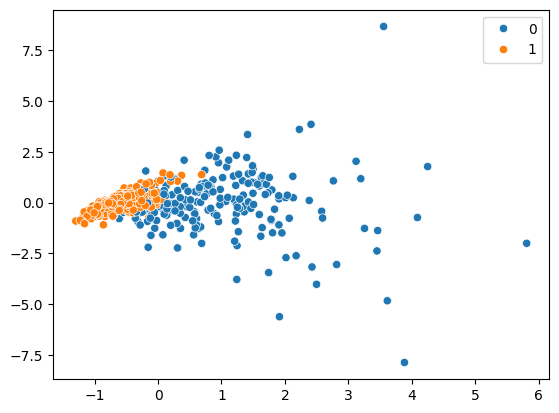

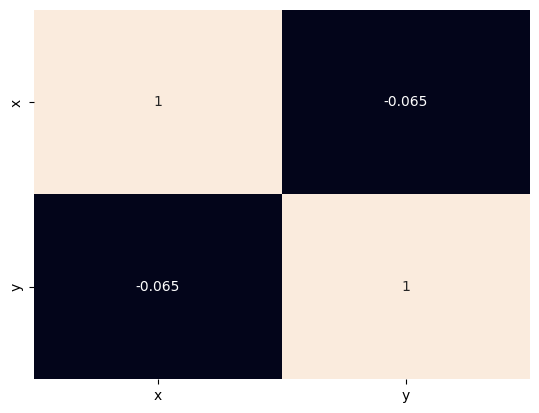

ic| unique_classes: array([0, 1])
    counts: array([212, 357])
    max_count: np.int64(357)
ic| pearson_cov: PearsonRResult(statistic=np.float64(9.332812300755222e-15), pvalue=np.float64(0.9999999999998203))
    variance: np.float64(1.0000000000000089)
    desc:             Default
          count  5.690000e+02
          mean   1.717041e-17
          std    1.000880e+00
          min   -3.105877e+00
          25%   -6.058157e-01
          50%   -1.767331e-01
          75%    3.655205e-01
          max    8.759374e+00


(PearsonRResult(statistic=np.float64(9.332812300755222e-15), pvalue=np.float64(0.9999999999998203)),
 np.float64(1.0000000000000089),
             Default
 count  5.690000e+02
 mean   1.717041e-17
 std    1.000880e+00
 min   -3.105877e+00
 25%   -6.058157e-01
 50%   -1.767331e-01
 75%    3.655205e-01
 max    8.759374e+00)

In [10]:
sns.scatterplot(x=cancer_data[:, 0], y=cancer_data[:, 1], hue=cancer_data_default.target)
plt.show()

dataResults(cancer_standard, cancer_data_default.target, 'Default')

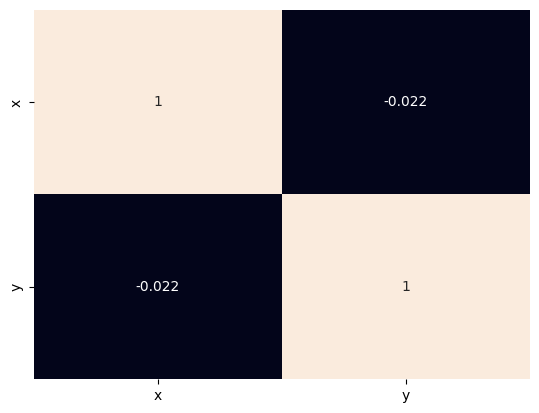

ic| unique_classes: array([0, 1])
    counts: array([356, 357])
    max_count: np.int64(357)
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.0142091379143648), pvalue=np.float64(0.7048611437618653))
    variance: np.float64(1.5627615009772213)
    desc:                 RAM
          count  7.130000e+02
          mean   1.993107e-17
          std    1.250982e+00
          min   -7.596204e+00
          25%   -4.567019e-01
          50%   -4.874835e-02
          75%    3.869140e-01
          max    8.858627e+00


(PearsonRResult(statistic=np.float64(0.0142091379143648), pvalue=np.float64(0.7048611437618653)),
 np.float64(1.5627615009772213),
                 RAM
 count  7.130000e+02
 mean   1.993107e-17
 std    1.250982e+00
 min   -7.596204e+00
 25%   -4.567019e-01
 50%   -4.874835e-02
 75%    3.869140e-01
 max    8.858627e+00)

In [11]:
#RAM
ram_data = cancer_data.copy()

cancer_RAM_x, cancer_RAM_y = radiousAngleMethod(ram_data, cancer_data_default.target, 7)

plot_data(cancer_data, cancer_data_default.target, cancer_RAM_x, cancer_RAM_y)

dataResults(cancer_RAM_x, cancer_RAM_y, 'RAM')

ic| unique_classes: array([0, 1])
    counts: array([357, 357])
    max_count: np.int64(357)
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.07768362392447142), pvalue=np.float64(0.03796181936741675))
    variance: np.float64(1.2607125571282252)
    desc:               SMOTE
          count  7.140000e+02
          mean  -5.473368e-17
          std    1.123602e+00
          min   -8.477822e+00
          25%   -2.154356e-01
          50%    3.195622e-01
          75%    5.612182e-01
          max    4.864764e+00


(PearsonRResult(statistic=np.float64(-0.07768362392447142), pvalue=np.float64(0.03796181936741675)),
 np.float64(1.2607125571282252),
               SMOTE
 count  7.140000e+02
 mean  -5.473368e-17
 std    1.123602e+00
 min   -8.477822e+00
 25%   -2.154356e-01
 50%    3.195622e-01
 75%    5.612182e-01
 max    4.864764e+00)

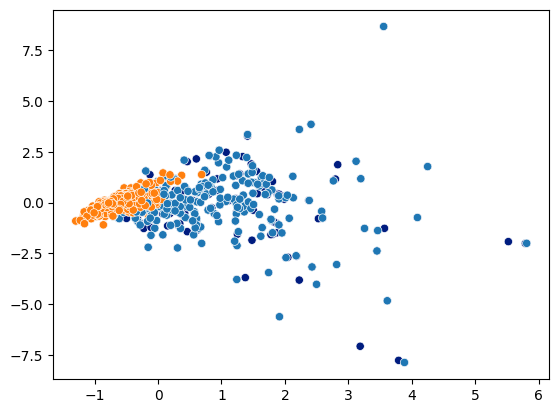

In [12]:
#SMOTE
smote_data = cancer_data.copy()

cancer_SMOTE_x, cancer_SMOTE_y = SMOTE().fit_resample(smote_data, cancer_data_default.target)

plot_data(cancer_data, cancer_data_default.target, cancer_SMOTE_x, cancer_SMOTE_y)

dataResults(cancer_SMOTE_x, cancer_SMOTE_y, 'SMOTE')

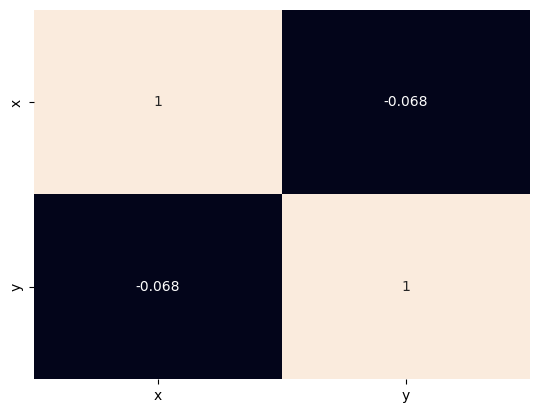

ic| unique_classes: array([0, 1])
    counts: array([351, 357])
    max_count: np.int64(357)
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.024291128810894687), pvalue=np.float64(0.5187340600122164))
    variance: np.float64(0.8977650752164635)
    desc:              ADASYN
          count  7.080000e+02
          mean   5.017957e-18
          std    9.481745e-01
          min   -6.601005e+00
          25%   -4.780266e-01
          50%   -1.016344e-01
          75%    3.854221e-01
          max    9.250727e+00


(PearsonRResult(statistic=np.float64(0.024291128810894687), pvalue=np.float64(0.5187340600122164)),
 np.float64(0.8977650752164635),
              ADASYN
 count  7.080000e+02
 mean   5.017957e-18
 std    9.481745e-01
 min   -6.601005e+00
 25%   -4.780266e-01
 50%   -1.016344e-01
 75%    3.854221e-01
 max    9.250727e+00)

In [13]:
#ADASYN
adasyn_data = cancer_data.copy()

cancer_ADASYN_x, cancer_ADASYN_y = ADASYN().fit_resample(adasyn_data, cancer_data_default.target)

plot_data(cancer_data, cancer_data_default.target, cancer_ADASYN_x, cancer_ADASYN_y)

dataResults(cancer_ADASYN_x, cancer_ADASYN_y, 'ADASYN')

ic| unique_classes: array([0, 1])
    counts: array([357, 357])
    max_count: np.int64(357)
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.10092716053624637), pvalue=np.float64(0.0069543641153062994))
    variance: np.float64(1.3577522937866224)
    desc:                 ROS
          count  7.140000e+02
          mean  -4.478211e-17
          std    1.166043e+00
          min   -8.589806e+00
          25%   -2.299521e-01
          50%    2.757821e-01
          75%    5.667566e-01
          max    5.710937e+00


(PearsonRResult(statistic=np.float64(-0.10092716053624637), pvalue=np.float64(0.0069543641153062994)),
 np.float64(1.3577522937866224),
                 ROS
 count  7.140000e+02
 mean  -4.478211e-17
 std    1.166043e+00
 min   -8.589806e+00
 25%   -2.299521e-01
 50%    2.757821e-01
 75%    5.667566e-01
 max    5.710937e+00)

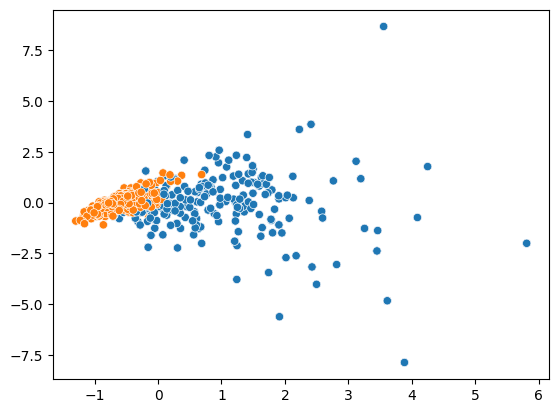

In [14]:
#random oversampling
ros = RandomOverSampler(random_state=0)
ros_data = cancer_data.copy()

cancer_ROS_x, cancer_ROS_y = ros.fit_resample(ros_data, cancer_data_default.target)

plot_data(cancer_data, cancer_data_default.target, cancer_ROS_x, cancer_ROS_y)

dataResults(cancer_ROS_x, cancer_ROS_y, 'ROS')

In [15]:
wine_data_default = wine
wine_data = pca.fit_transform(wine_data_default.data)
wine_data = standard_scaler.fit_transform(wine_data)

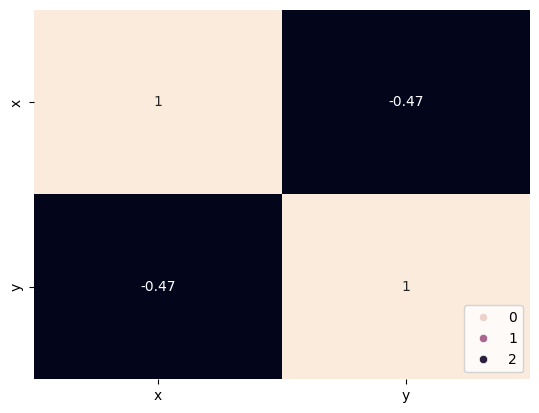

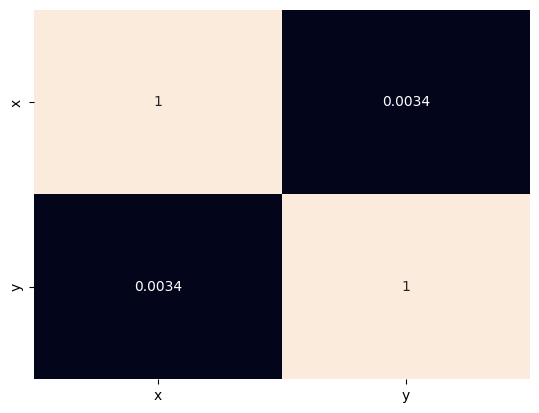

ic| unique_classes: array([0, 1, 2])
    counts: array([59, 71, 48])
    max_count: np.int64(71)
ic| pearson_cov: PearsonRResult(statistic=np.float64(1.1796119636642288e-15), pvalue=np.float64(0.9999999999999879))
    variance: np.float64(1.0000000000000009)
    desc:             Default
          count  1.780000e+02
          mean   3.991813e-17
          std    1.002821e+00
          min   -1.815035e+00
          25%   -8.748825e-01
          50%   -9.052722e-03
          75%    5.702223e-01
          max    3.728698e+00


(PearsonRResult(statistic=np.float64(1.1796119636642288e-15), pvalue=np.float64(0.9999999999999879)),
 np.float64(1.0000000000000009),
             Default
 count  1.780000e+02
 mean   3.991813e-17
 std    1.002821e+00
 min   -1.815035e+00
 25%   -8.748825e-01
 50%   -9.052722e-03
 75%    5.702223e-01
 max    3.728698e+00)

In [16]:
sns.scatterplot(x=wine_data[:, 0], y=wine_data[:, 1], hue=wine_data_default.target)
dataResults(wine_standard, wine_data_default.target, 'Default')

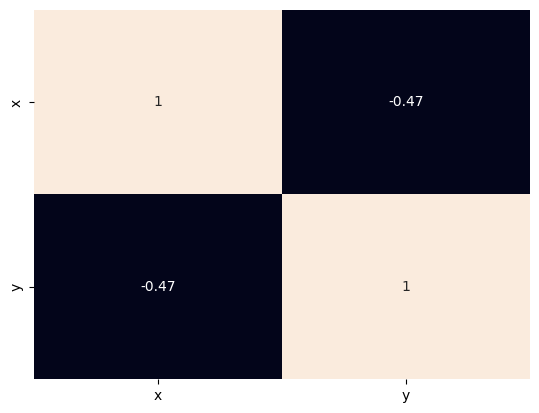

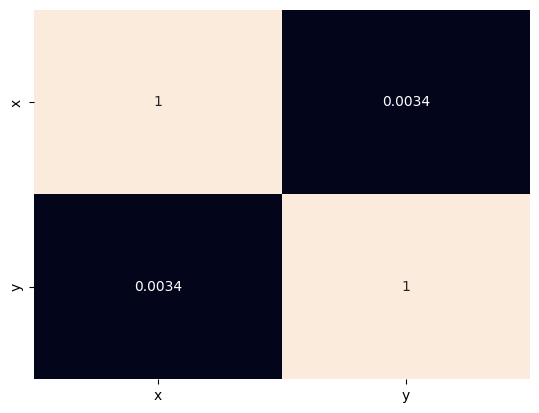

ic| unique_classes: array([0, 1, 2])
    counts: array([59, 71, 48])
    max_count: np.int64(71)
ic| pearson_cov: PearsonRResult(statistic=np.float64(1.1796119636642288e-15), pvalue=np.float64(0.9999999999999879))
    variance: np.float64(1.0000000000000009)
    desc:             Default
          count  1.780000e+02
          mean   3.991813e-17
          std    1.002821e+00
          min   -1.815035e+00
          25%   -8.748825e-01
          50%   -9.052722e-03
          75%    5.702223e-01
          max    3.728698e+00


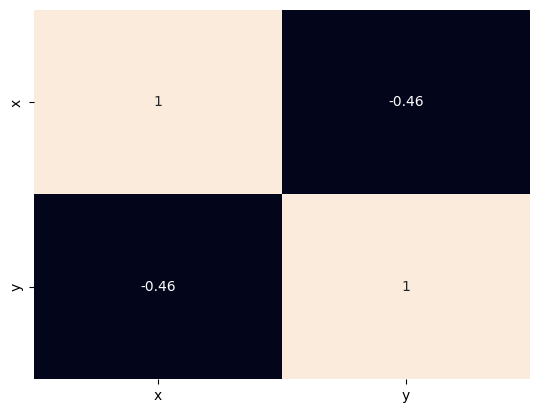

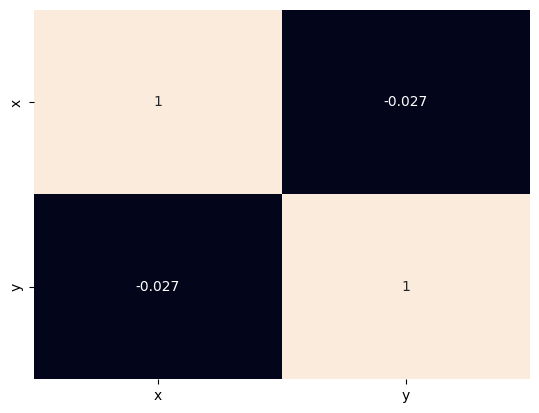

ic| unique_classes: array([0, 1, 2])
    counts: array([60, 71, 59])
    max_count: np.int64(71)
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.004637161893770662), pvalue=np.float64(0.9493704226505398))
    variance: np.float64(0.965878387834241)
    desc:                 RAM
          count  1.900000e+02
          mean   1.869849e-17
          std    9.853877e-01
          min   -2.327831e+00
          25%   -6.000838e-01
          50%   -6.003843e-02
          75%    5.198932e-01
          max    3.504088e+00
ic| unique_classes: array([0, 1, 2])
    counts: array([71, 71, 71])
    max_count: np.int64(71)
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.04321732698138317), pvalue=np.float64(0.530450957397202))
    variance: np.float64(0.9907103244062255)
    desc:             SMOTE
          count  213.000000
          mean     0.000000
          std      0.997689
          min     -2.370436
          25%     -0.545708
          50%      0.018658
          75%      0.

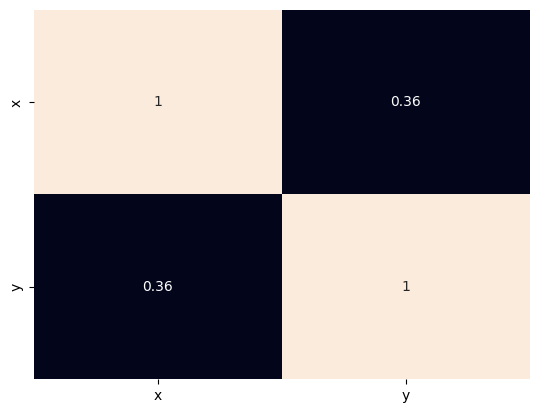

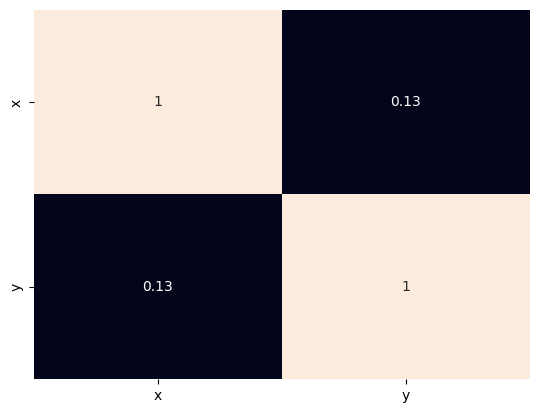

ic| unique_classes: array([0, 1, 2])
    counts: array([73, 71, 71])
    max_count: np.int64(73)
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.027883933444898125), pvalue=np.float64(0.6843353508587956))
    variance: np.float64(0.9862614248299985)
    desc:              ADASYN
          count  2.150000e+02
          mean  -4.131062e-18
          std    9.954246e-01
          min   -2.189577e+00
          25%   -7.832778e-01
          50%   -1.748817e-01
          75%    5.146398e-01
          max    4.462875e+00
ic| unique_classes: array([0, 1, 2])
    counts: array([71, 71, 71])
    max_count: np.int64(71)
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.00068126522133009), pvalue=np.float64(0.9921136522819708))
    variance: np.float64(0.9614187457614816)
    desc:               ROS
          count  213.000000
          mean     0.000000
          std      0.982829
          min     -2.108109
          25%     -0.647348
          50%     -0.195045
          75%      0

(PearsonRResult(statistic=np.float64(-0.00068126522133009), pvalue=np.float64(0.9921136522819708)),
 np.float64(0.9614187457614816),
               ROS
 count  213.000000
 mean     0.000000
 std      0.982829
 min     -2.108109
 25%     -0.647348
 50%     -0.195045
 75%      0.439237
 max      4.404158)

In [17]:
ram_data = wine_data.copy()
smote_data = wine_data.copy()
adasyn_data = wine_data.copy()
ros_data = wine_data.copy()

wine_RAM_x, wine_RAM_y = radiousAngleMethod(ram_data, wine_data_default.target, 7)

wine_SMOTE_x, wine_SMOTE_y = SMOTE().fit_resample(smote_data, wine_data_default.target)

wine_ADASYN_x, wine_ADASYN_y = ADASYN().fit_resample(adasyn_data, wine_data_default.target)

ros = RandomOverSampler(random_state=0)
wine_ROS_x, wine_ROS_y = ros.fit_resample(ros_data, wine_data_default.target)


plot_data(wine_data, wine_data_default.target, wine_RAM_x, wine_RAM_y)

dataResults(wine_standard, wine_data_default.target, 'Default')
dataResults(wine_RAM_x, wine_RAM_y, 'RAM')
dataResults(wine_SMOTE_x, wine_SMOTE_y, 'SMOTE')
dataResults(wine_ADASYN_x, wine_ADASYN_y, 'ADASYN')
dataResults(wine_ROS_x, wine_ROS_y, 'ROS')

<Axes: >

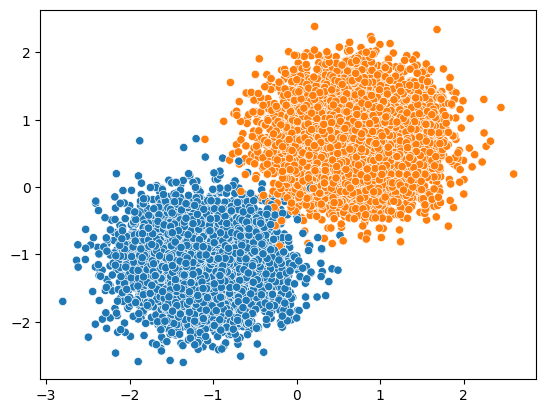

In [18]:
blob_data, blob_features = make_blobs(n_samples=[5000, 8000], centers=[[-2, -2], [2, 2]], n_features=2, random_state=1)

blob_data = standard_scaler.fit_transform(blob_data)

sns.scatterplot(x=blob_data[:, 0], y=blob_data[:, 1], hue=blob_features, legend=False)

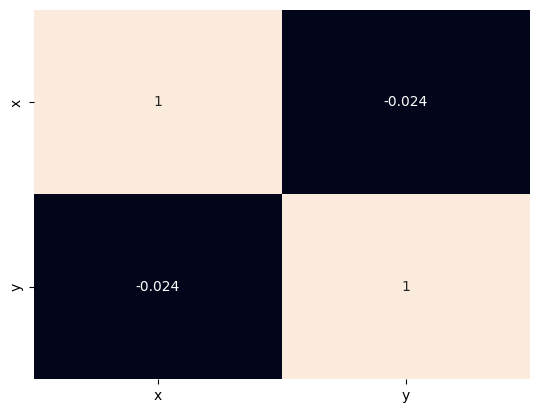

ic| unique_classes: array([0, 1])
    counts: array([5000, 8000])
    max_count: np.int64(8000)
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7898423430815839), pvalue=np.float64(0.0))
    variance: np.float64(1.7898423430815822)
    desc:             Default
          count  1.300000e+04
          mean   2.514228e-17
          std    1.337901e+00
          min   -3.339159e+00
          25%   -1.425754e+00
          50%    5.881874e-01
          75%    1.101796e+00
          max    2.842029e+00


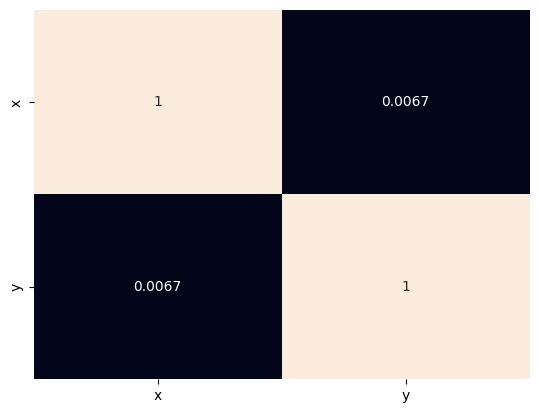

ic| unique_classes: array([0, 1])
    counts: array([8010, 8000])
    max_count: np.int64(8010)
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.797919982368487), pvalue=np.float64(0.0))
    variance: np.float64(1.8771944490499133)
    desc:                 RAM
          count  1.601000e+04
          mean   3.976554e-16
          std    1.370150e+00
          min   -3.040523e+00
          25%   -1.297165e+00
          50%   -3.873226e-02
          75%    1.295173e+00
          max    3.140499e+00
ic| unique_classes: array([0, 1])
    counts: array([8000, 8000])
    max_count: np.int64(8000)
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7993821406714574), pvalue=np.float64(0.0))
    variance: np.float64(1.8795051889553145)
    desc:               SMOTE
          count  1.600000e+04
          mean   1.421085e-16
          std    1.370993e+00
          min   -3.040407e+00
          25%   -1.297806e+00
          50%   -1.610078e-02
          75%    1.294993e+00
          max

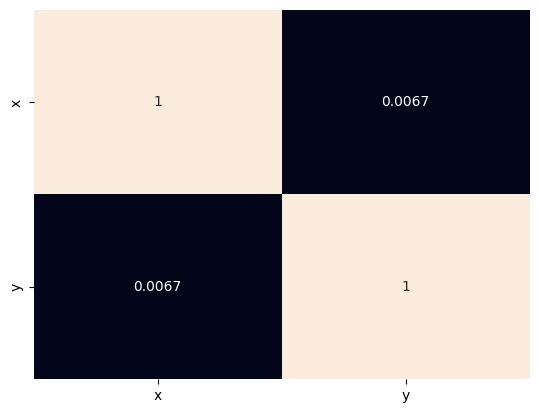

ic| unique_classes: array([0, 1])
    counts: array([8013, 8000])
    max_count: np.int64(8013)
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7522422152351875), pvalue=np.float64(0.0))
    variance: np.float64(1.482040268294762)
    desc:              ADASYN
          count  1.601300e+04
          mean   2.839864e-17
          std    1.217429e+00
          min   -3.264100e+00
          25%   -1.132315e+00
          50%    2.875828e-02
          75%    1.071431e+00
          max    2.917070e+00
ic| unique_classes: array([0, 1])
    counts: array([8000, 8000])
    max_count: np.int64(8000)
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7985110764617698), pvalue=np.float64(0.0))
    variance: np.float64(1.8799405790767532)
    desc:                 ROS
          count  1.600000e+04
          mean  -4.831691e-16
          std    1.371152e+00
          min   -3.039984e+00
          25%   -1.291505e+00
          50%   -2.013098e-02
          75%    1.295598e+00
          max

(PearsonRResult(statistic=np.float64(0.7985110764617698), pvalue=np.float64(0.0)),
 np.float64(1.8799405790767532),
                 ROS
 count  1.600000e+04
 mean  -4.831691e-16
 std    1.371152e+00
 min   -3.039984e+00
 25%   -1.291505e+00
 50%   -2.013098e-02
 75%    1.295598e+00
 max    3.141347e+00)

In [19]:
ram_data = blob_data.copy()
smote_data = blob_data.copy()
adasyn_data = blob_data.copy()
ros_data = blob_data.copy()

blob_RAM_x, blob_RAM_y = radiousAngleMethod(ram_data, blob_features, 7)

blob_SMOTE_x, blob_SMOTE_y = SMOTE().fit_resample(smote_data, blob_features)

blob_ADASYN_x, blob_ADASYN_y = ADASYN().fit_resample(adasyn_data, blob_features)

ros = RandomOverSampler(random_state=0)
blob_ROS_x, blob_ROS_y = ros.fit_resample(ros_data, blob_features)

dataResults(blob_data, blob_features, 'Default')
dataResults(blob_RAM_x, blob_RAM_y, 'RAM')
dataResults(blob_SMOTE_x, blob_SMOTE_y, 'SMOTE')
dataResults(blob_ADASYN_x, blob_ADASYN_y, 'ADASYN')
dataResults(blob_ROS_x, blob_ROS_y, 'ROS')

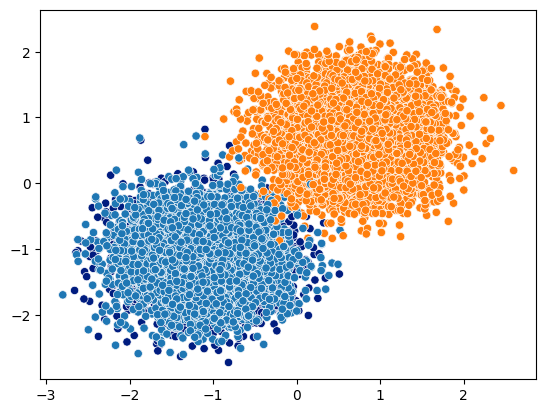

In [20]:
plot_data(blob_data, blob_features, blob_RAM_x, blob_RAM_y)

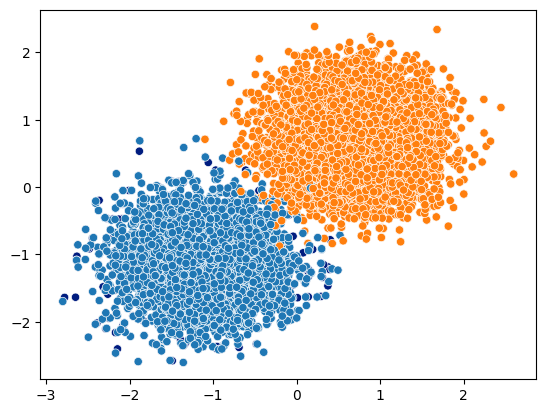

In [21]:
plot_data(blob_data, blob_features, blob_SMOTE_x, blob_SMOTE_y)

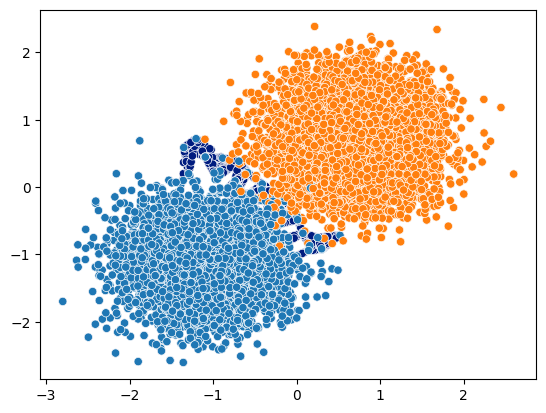

In [22]:
plot_data(blob_data, blob_features, blob_ADASYN_x, blob_ADASYN_y)

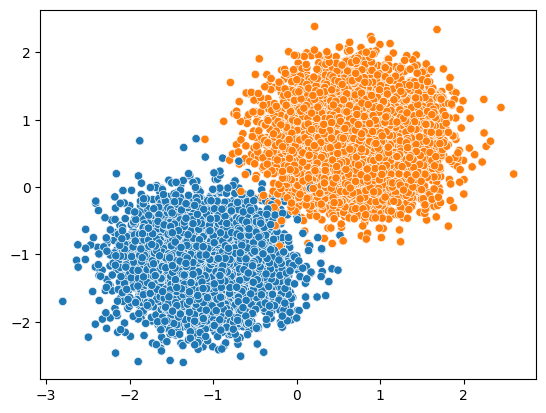

In [23]:
plot_data(blob_data, blob_features, blob_ROS_x, blob_ROS_y)